# TP8 : Eléments de théorie bayésienne de la décision

## 2. Partie pratique

### 2.1 Protocole de simulation

In [1]:
import numpy as np
import random 
import pandas as pd

n = 1000
pi1 = 0.6
pi2 = 0.4
lambda1 = 1
lambda2 = 2
theta1 = 2
theta2 = 1


#### Génération de l'échantillon

In [2]:
n1 = np.random.binomial(n, pi1)
n2 = n - n1

X1 = np.column_stack(
    (np.random.exponential(scale = 1 / lambda1, size = n1),
    np.random.exponential(scale = 1 / lambda2, size = n1))
)

X2 = np.column_stack(
    (np.random.exponential(scale = 1 / theta1, size = n2),
    np.random.exponential(scale = 1 / theta2, size = n2))
)

Z = np.repeat(["w_1", "w_2"], [n1, n2])


# Shuffle
from sklearn.utils import shuffle
X = np.concatenate((X1, X2), axis = 0)
X, Z = shuffle(X, Z)

data = pd.DataFrame(data=dict(X1=X[:, 0], X2=X[:, 1], Classe=Z))
data


,X1,X2,Classe
0,0.400229,1.214335,w_2
1,0.482928,0.367233,w_2
2,0.101751,2.810187,w_2
3,0.815298,0.028125,w_1
4,1.653188,0.783603,w_1
...,...,...,...
995,2.759213,0.226890,w_1
996,0.643149,0.407913,w_1
997,1.106141,0.426581,w_1
998,1.710400,0.095137,w_2


#### Affichage des données simulées

[Text(0.5, 1.0, 'Données simulées'), Text(0.5, 0, 'X1'), Text(0, 0.5, 'X2')]

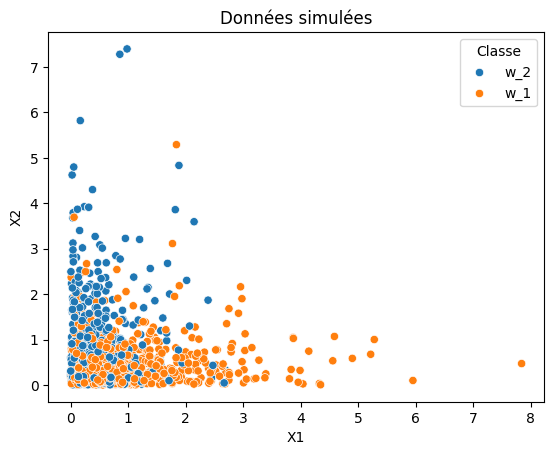

In [3]:
import seaborn as sns

sns.scatterplot(x = data["X1"], y = data["X2"], hue = data["Classe"]).set(title = "Données simulées", xlabel = "X1", ylabel = "X2")

#### Taux d'erreur de Bayes

In [5]:
def delta(row):
    x, y = row
    cste = np.log(theta1 * theta2 * pi2 / lambda1 / lambda2 / pi1)
    d = (theta1 - lambda1) * x + (theta2 - lambda2) * y - cste
    return "w_1" if d >= 0 else "w_2"
pred = np.apply_along_axis(delta, 1, X)

taux_Bayes = np.mean(pred != data["Classe"])
taux_Bayes

0.297

#### Frontière de décision

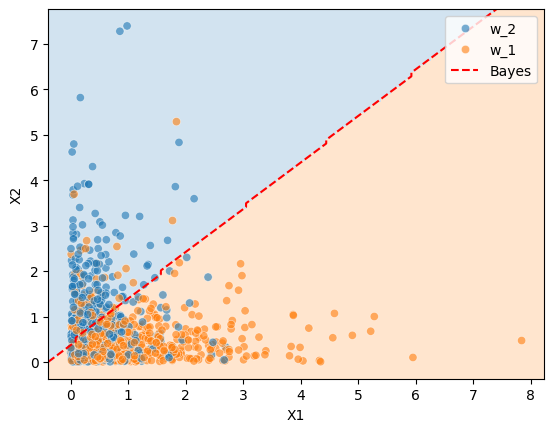

In [7]:
from utils import add_decision_boundary
import matplotlib.pyplot as plt

def predict(X):
    return np.apply_along_axis(delta, 1, X)

sns.scatterplot(x="X1", y="X2", hue="Classe", data=data, alpha=.6)
add_decision_boundary(predict, label="Bayes", model_classes=["w_1","w_2"])
plt.show()